# Case study
Analysis of dataset, which consists of data about medical insurance <br> https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [2]:
# Importing the datasets
df = pd.read_csv('data/05-insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

## Missing values

In [4]:
# Counting the missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

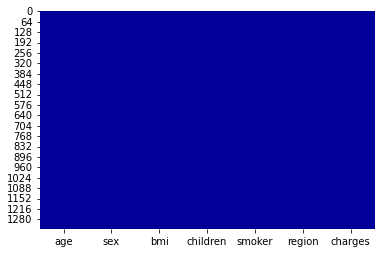

In [5]:
# Visualizing the missing values
colours = ['#000099', '#ffff00'] 
sns.heatmap(df.isnull(), cbar=False, cmap=sns.color_palette(colours))

There are no missing values in this dataset. If your dataset has missing values, then, e.g., you can replace them with the median.

In [6]:
# Replacing the missing numerical values (if any)
num_col = ['age', 'bmi', 'children', 'charges']
for col in num_col:
    df[col] = pd.to_numeric(df[col])
    df[col].fillna(df[col].median(), inplace=True)
    
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Descriptive statistics

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


## Asking Analytical Questions and Visualizations

Text(0.5, 1.0, 'Distribution of Charges')

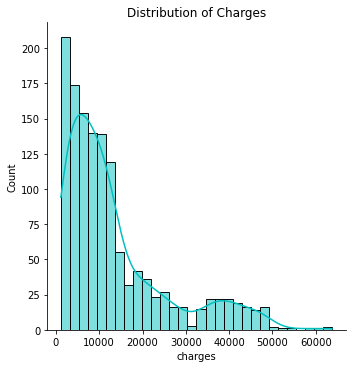

In [9]:
# The distribution for charges

sns.displot(df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges')

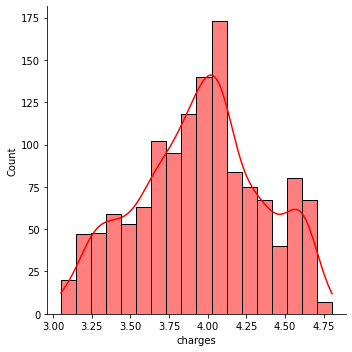

In [10]:
# This distribution is right-skewed. 
# Apply natural log to make it closer to normal

sns.displot(np.log10(df['charges']), kde = True, color = 'r' )

Now we are going to analyze the correlations between features. To do this, we first convert the categorical features into numerical ones.

In [11]:
# Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')

# Converting category labels into numerical using LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)

<AxesSubplot:>

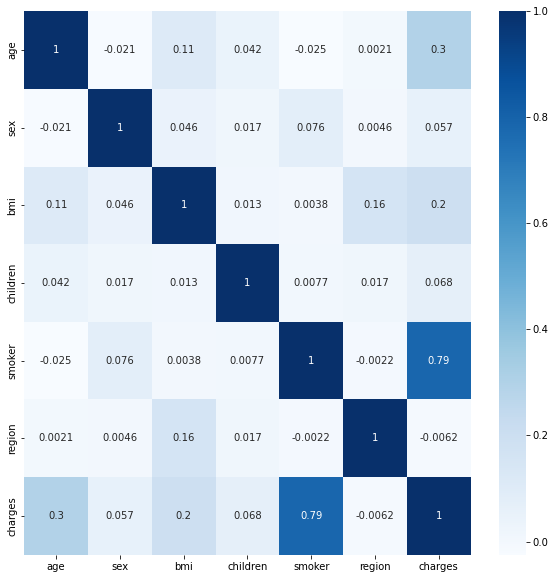

In [12]:
# Pairwise correlations
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Blues')

## Class breakdowns
Above, we have transformed the original dataset. So now we are rereading it.

In [13]:
#Re-read data
df = pd.read_csv('data/05-insurance.csv')

# Aggregation
df.groupby('region').aggregate([min, np.mean, max]).T

region            northeast     northwest     southeast     southwest
age      min      18.000000     19.000000     18.000000     19.000000
         mean     39.268519     39.196923     38.939560     39.455385
         max      64.000000     64.000000     64.000000     64.000000
bmi      min      15.960000     17.385000     19.800000     17.400000
         mean     29.173503     29.199785     33.355989     30.596615
         max      48.070000     42.940000     53.130000     47.600000
children min       0.000000      0.000000      0.000000      0.000000
         mean      1.046296      1.147692      1.049451      1.141538
         max       5.000000      5.000000      5.000000      5.000000
charges  min    1694.796400   1621.340200   1121.873900   1241.565000
         mean  13406.384516  12417.575374  14735.411438  12346.937377
         max   58571.074480  60021.398970  63770.428010  52590.829390

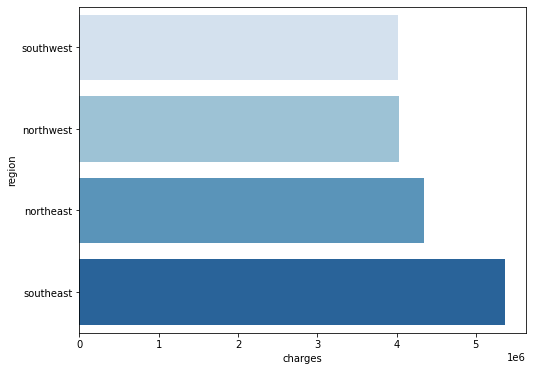

In [14]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(x=charges.head(), y=charges.head().index, palette='Blues')

<AxesSubplot:xlabel='region', ylabel='charges'>

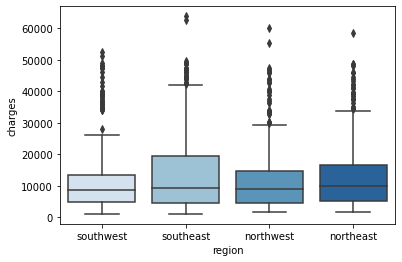

In [15]:
# Box plot for charges in each region
sns.boxplot(x='region', y='charges', data=df, palette='Blues')

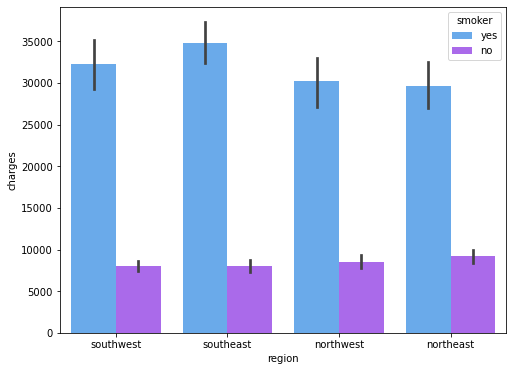

In [16]:
f, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.barplot(x = 'region', y = 'charges', hue='smoker', data=df, palette='cool')

There is obviously a difference between smokers and non-smokers in all regions. We add a dummy variable for the characteristic "smoker" to be used in the next steps of the analysis.

In [17]:
# One-Hot encoding the smoker parameter
ohe_df = pd.get_dummies(df, columns = ['smoker'])
ohe_df.head()

,age,sex,bmi,children,region,charges,smoker_no,smoker_yes
0,19,female,27.900,0,southwest,16884.92400,0,1
1,18,male,33.770,1,southeast,1725.55230,1,0
2,28,male,33.000,3,southeast,4449.46200,1,0
3,33,male,22.705,0,northwest,21984.47061,1,0
4,32,male,28.880,0,northwest,3866.85520,1,0


In [18]:
# Save dataframe with dummy variables
ohe_df.to_csv('data/05-insurance_ohe.csv', index=False) 